## 最大流最小费

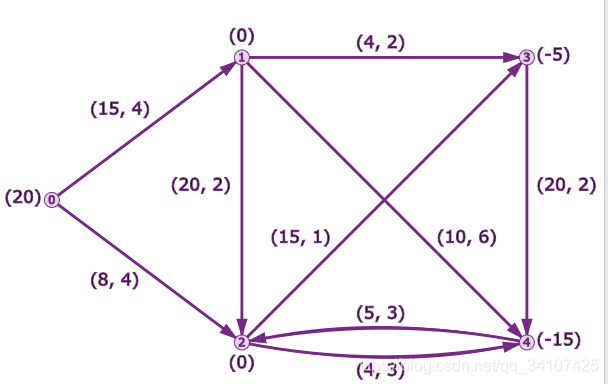

### 载入

In [1]:
from ortools.graph import pywrapgraph
import numpy as np

### 方法

In [2]:
def changeToList(mat):
    if(type(mat) == np.ndarray):
        start_nodes = []
        end_nodes = []
        capacities = []
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                if mat[i][j] != 0:
                    start_nodes.append(i)
                    end_nodes.append(j)
                    capacities.append(int(mat[i][j]))  # 注意这里改成了整数型，如果有需要请扩大处理
        return start_nodes, end_nodes, capacities

    elif(type(mat) == list):
        start_nodes = []
        end_nodes = []
        capacities = []
        unit_costs = []
        for i in mat:
            start_nodes.append(i[0])
            end_nodes.append(i[1])
            capacities.append(int(i[2]))
            unit_costs.append(int(i[3]))
        return start_nodes, end_nodes, capacities, unit_costs

### 参量

#### 写法二

In [3]:
matrix = [(0, 1, 15, 4), (0, 2, 8, 4), (1, 2, 20, 2), (1, 3, 4, 2),
          (1, 4, 10, 6), (2, 3, 15, 1), (2, 4, 4, 3), (3, 4, 20, 2), (4, 2, 5, 3)]
start_nodes, end_nodes, capacities, unit_costs = changeToList(matrix)
supplies = [20, 0, 0, -5, -15]
min_cost_flow = pywrapgraph.SimpleMinCostFlow()
#写法2
# #between each pair. For instance, the arc from node 0 to node 1 has acapacity of 15 and a unit cost of 4.
# start_nodes = [ 0, 0,  1, 1,  1,  2, 2,  3, 4]
# end_nodes   = [ 1, 2,  2, 3,  4,  3, 4,  4, 2]
# capacities  = [15, 8, 20, 4, 10, 15, 4, 20, 5]
# unit_costs  = [ 4, 4,  2, 2,  6,  1, 3,  2, 3]
# # Define an array of supplies at each node.
# supplies = [20, 0, 0, -5, -15]
# # Instantiate a SimpleMinCostFlow solver.
# min_cost_flow = pywrapgraph.SimpleMinCostFlow()
# # Add each arc.

### 展示

In [4]:
print(matrix)
print(start_nodes)
print(end_nodes)
print(capacities)
print(unit_costs)
print(supplies)

[(0, 1, 15, 4), (0, 2, 8, 4), (1, 2, 20, 2), (1, 3, 4, 2), (1, 4, 10, 6), (2, 3, 15, 1), (2, 4, 4, 3), (3, 4, 20, 2), (4, 2, 5, 3)]
[0, 0, 1, 1, 1, 2, 2, 3, 4]
[1, 2, 2, 3, 4, 3, 4, 4, 2]
[15, 8, 20, 4, 10, 15, 4, 20, 5]
[4, 4, 2, 2, 6, 1, 3, 2, 3]
[20, 0, 0, -5, -15]


### 主体函数

In [5]:
for i in range(0, len(start_nodes)):
    min_cost_flow.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i],
                                                capacities[i], unit_costs[i])
# Add node supplies.

for i in range(0, len(supplies)):
    min_cost_flow.SetNodeSupply(i, supplies[i])
 # Find the minimum cost flow between node 0 and node 4.
if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
    print('Minimum cost:', min_cost_flow.OptimalCost())
    print('')
    print('  Arc    Flow / Capacity  Cost')
    for i in range(min_cost_flow.NumArcs()):
        cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i)
        print('%1s -> %1s   %3s  / %3s       %3s' % (
            min_cost_flow.Tail(i),
            min_cost_flow.Head(i),
            min_cost_flow.Flow(i),
            min_cost_flow.Capacity(i),
            cost))
else:
    print('There was an issue with the min cost flow input.')

Minimum cost: 150

  Arc    Flow / Capacity  Cost
0 -> 1    12  /  15        48
0 -> 2     8  /   8        32
1 -> 2     8  /  20        16
1 -> 3     4  /   4         8
1 -> 4     0  /  10         0
2 -> 3    12  /  15        12
2 -> 4     4  /   4        12
3 -> 4    11  /  20        22
4 -> 2     0  /   5         0
